# Importing data From Relational Databases

In [1]:
# import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Using SQLAlchemy  Library 

In [2]:
import sqlalchemy

## Create Engine 
Using create_engine() funciton from sqlalchemy to Connect Database from file directory or URL

In [3]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/data.db')

engine.table_names()

['boro_census', 'hpd311calls', 'weather']

## Load table
Load table from engine to pandas DataFrame with or without query

In [4]:
# without query
hpd_calls_df = pd.read_sql('hpd311calls', engine)

# with query
weather_df = pd.read_sql('SELECT * FROM weather;', engine)

In [5]:
# show head of hpd_calls_df 
hpd_calls_df.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN


In [6]:
# show head weather_df
weather_df.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


## More query

In [7]:
# see maximum and minimum temperature
temperatures = pd.read_sql('SELECT date, tmax, tmin FROM weather;', engine)

temperatures

,date,tmax,tmin
0,12/01/2017,52,42
1,12/02/2017,48,39
2,12/03/2017,48,42
3,12/04/2017,51,40
4,12/05/2017,61,50
...,...,...,...
116,03/27/2018,47,34
117,03/28/2018,52,38
118,03/29/2018,53,49
119,03/30/2018,62,44


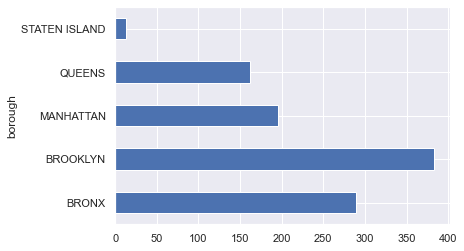

In [8]:
# see number of safety complaint by borough/district
safety_complaint = pd.read_sql(
    'SELECT * FROM hpd311calls\
        WHERE complaint_type == "SAFETY";', engine
)


# plotting
sns.set()
call_counts = safety_complaint.groupby('borough').unique_key.count()
call_counts.plot.barh()

In [9]:
# see calls count by complaint_type
calls_by_issue = pd.read_sql(
    'SELECT complaint_type, COUNT(*)\
        FROM hpd311calls GROUP BY complaint_type ORDER BY COUNT(*) DESC;', engine
)

calls_by_issue

,complaint_type,COUNT(*)
0,HEAT/HOT WATER,56740
1,PLUMBING,7117
2,UNSANITARY CONDITION,6820
3,PAINT/PLASTER,5680
4,DOOR/WINDOW,4451
5,WATER LEAK,3567
6,ELECTRIC,2777
7,GENERAL,2615
8,FLOORING/STAIRS,2190
9,APPLIANCE,1307


In [10]:
# see maximum and minimum temperature by month
weather_by_month = pd.read_sql(
    'SELECT month, MAX(tmax), MIN(tmin), SUM(prcp)\
        FROM weather GROUP BY month;', engine
)

weather_by_month

,month,MAX(tmax),MIN(tmin),SUM(prcp)
0,December,61,9,2.21
1,February,78,16,5.83
2,January,61,5,2.18
3,March,62,27,5.17


In [11]:
# join table
calls_and_weather = pd.read_sql(
    'SELECT * FROM hpd311calls JOIN weather\
        ON hpd311calls.created_date = weather.date;', engine
)

calls_and_weather

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91994,38353080,01/31/2018,HPD,HEAT/HOT WATER,10457,1511 SHERIDAN AVENUE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
91995,38354647,01/31/2018,HPD,HEAT/HOT WATER,10457,1860 GRAND CONCOURSE,05 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
91996,38352537,01/31/2018,HPD,HEAT/HOT WATER,10462,2090 EAST TREMONT AVENUE,09 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
91997,38349554,01/31/2018,HPD,HEAT/HOT WATER,11213,187 ROCHESTER AVENUE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18


# Census Databases Case Study

Create engine for census databases

In [13]:
census_engine = create_engine('sqlite:///data/census.sqlite')

census_engine.table_names()

['census', 'state_fact']

In [14]:
# create metadata object
metadata = sqlalchemy.MetaData()

In [15]:
# create connection
connection = census_engine.connect()

In [17]:
# create census sqlalchemy's table object
census = sqlalchemy.Table('census', metadata, autoload=True,  autoload_with=census_engine)

Check Each Table inside database with sqlalchemy library

In [19]:
# query with sqlalchemy select()
census_stmt = sqlalchemy.select([census])

# fetching result
census_result = connection.execute(census_stmt).fetchall()
pd.DataFrame(census_result)

,0,1,2,3,4
0,Illinois,M,0,89600,95012
1,Illinois,M,1,88445,91829
2,Illinois,M,2,88729,89547
3,Illinois,M,3,88868,90037
4,Illinois,M,4,91947,91111
...,...,...,...,...,...
8767,Texas,F,81,35378,44418
8768,Texas,F,82,33852,41838
8769,Texas,F,83,30076,40489
8770,Texas,F,84,27961,36821


In [20]:
#create state_fact Table object
state_fact = sqlalchemy.Table('state_fact', metadata, autoload=True,  autoload_with=census_engine)

# query with sqlalchemy select()
state_fact_stmt = sqlalchemy.select([state_fact])

# fetching result
state_fact_result = connection.execute(state_fact_stmt).fetchall()
pd.DataFrame(state_fact_result)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,13,Illinois,IL,USA,state,10,current,occupied,,17,Ill.,V,2,Midwest,3,East North Central,7
1,30,New Jersey,NJ,USA,state,10,current,occupied,,34,N.J.,II,1,Northeast,2,Mid-Atlantic,3
2,34,North Dakota,ND,USA,state,10,current,occupied,,38,N.D.,VIII,2,Midwest,4,West North Central,8
3,37,Oregon,OR,USA,state,10,current,occupied,,41,Ore.,X,4,West,9,Pacific,9
4,51,Washington DC,DC,USA,capitol,10,current,occupied,,11,,III,3,South,5,South Atlantic,D.C.
5,49,Wisconsin,WI,USA,state,10,current,occupied,,55,Wis.,V,2,Midwest,3,East North Central,7
6,3,Arizona,AZ,USA,state,10,current,occupied,,4,Ariz.,IX,4,West,8,Mountain,9
7,4,Arkansas,AR,USA,state,10,current,occupied,,5,Ark.,VI,3,South,7,West South Central,8
8,6,Colorado,CO,USA,state,10,current,occupied,,8,Colo.,VIII,4,West,8,Mountain,10
9,11,Hawaii,HI,USA,state,10,current,occupied,,15,Hawaii,IX,4,West,9,Pacific,9


In [22]:
# specify census_columns
census_columns = ['state', 'sex', 'age', 'pop2000', 'pop2008']

# create census as dataframe
census_df = pd.DataFrame(census_result)
census_df.columns = census_columns

# view head of census_df
census_df.head()

,state,sex,age,pop2000,pop2008
0,Illinois,M,0,89600,95012
1,Illinois,M,1,88445,91829
2,Illinois,M,2,88729,89547
3,Illinois,M,3,88868,90037
4,Illinois,M,4,91947,91111


In [23]:
# information about census_df table
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    8772 non-null   object
 1   sex      8772 non-null   object
 2   age      8772 non-null   int64 
 3   pop2000  8772 non-null   int64 
 4   pop2008  8772 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 342.8+ KB


In [24]:
# describe of census_df table
census_df.describe(include='all')

,state,sex,age,pop2000,pop2008
count,8772,8772,8772.000000,8772.000000,8772.000000
unique,51,2,NaN,NaN,NaN
top,North Dakota,F,NaN,NaN,NaN
freq,172,4386,NaN,NaN,NaN
mean,NaN,NaN,42.500000,32024.544574,34527.657661
std,NaN,NaN,24.825798,39631.449202,42508.117666
min,NaN,NaN,0.000000,217.000000,391.000000
25%,NaN,NaN,21.000000,7573.750000,8092.750000
50%,NaN,NaN,42.500000,19521.500000,20976.500000
75%,NaN,NaN,64.000000,39879.250000,42436.000000


### Population Difference between 2008 and 2000

In [30]:
# Build query to return state name and population difference from 2008 to 2000
stmt = sqlalchemy.select([census.columns.state,
     (census.columns.pop2008-census.columns.pop2000).label('pop_change')
])

# Group by State
stmt = stmt.group_by(census.columns.state)

# Order by Population Change
stmt = stmt.order_by(sqlalchemy.desc('pop_change'))

In [31]:
# fetch query
pop_change_result = connection.execute(stmt).fetchall()

# display as dataframe
pd.DataFrame(pop_change_result, columns=['State', 'Population Difference'])

,State,Population Difference
0,Texas,40137
1,California,35406
2,Florida,21954
3,Arizona,14377
4,Georgia,13357
5,North Carolina,11574
6,Virginia,6639
7,Colorado,6425
8,Utah,5934
9,Illinois,5412
